Jason Cain, Nathan Harms, Marissa Puzan
## Serotonin transport modeling 


Laminar flow model:

## $$ \frac{C_m}{C_o} = \sum_{n} M_n e^{- \beta^2 Gz} $$



from
$$v_z \frac{\partial C}{\partial z} = D \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial C}{\partial r} \right)$$
where 

$$ Gz = \frac{D L}{V_m R^2} $$

$$ P_w^* = P_w \left( \frac{R}{D} \right) $$

$$ M_n = f( P_w^* ) $$ 

$$ \beta = f( P_w^* ) $$ 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import namedtuple

In [2]:
import laminarFlow


In [3]:

ConditionSet = namedtuple('ConditionSet', ['Concentration', 'Diffusivity', 'Permeability'])
KineticsParamers = namedtuple('ConditionSet', ['vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'])


serCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 6.2424e-8,
                Permeability =7.576e-13)

trypCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 5.386e-8,
                Permeability = 6.44e-4)

htpCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 4.995e-8,
                Permeability = 7.576e-13)

kinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

wallKinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

# kinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

# wallKinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

radius = 2.5/100
length = 7.5
max_velocity = .0287/60
timestep = 60/3600
rings = 20
sections = 500

Model = laminarFlow.LaminarFlow(length, radius, max_velocity, trypCondition, htpCondition, serCondition, kinetics, wallKinetics, rings, sections, timestep)

Running 1 of 261
Running 2 of 261
Running 3 of 261
Running 4 of 261
Running 5 of 261
Running 6 of 261
Running 7 of 261
Running 8 of 261
Running 9 of 261
Running 10 of 261
Running 11 of 261
Running 12 of 261
Running 13 of 261
Running 14 of 261
Running 15 of 261
Running 16 of 261
Running 17 of 261
Running 18 of 261
Running 19 of 261
Running 20 of 261
Running 21 of 261
Running 22 of 261
Running 23 of 261
Running 24 of 261
Running 25 of 261
Running 26 of 261
Running 27 of 261
Running 28 of 261
Running 29 of 261
Running 30 of 261
Running 31 of 261
Running 32 of 261
Running 33 of 261
Running 34 of 261
Running 35 of 261
Running 36 of 261
Running 37 of 261
Running 38 of 261
Running 39 of 261
Running 40 of 261
Running 41 of 261
Running 42 of 261
Running 43 of 261
Running 44 of 261
Running 45 of 261
Running 46 of 261
Running 47 of 261
Running 48 of 261
Running 49 of 261
Running 50 of 261
Running 51 of 261
Running 52 of 261
Running 53 of 261
Running 54 of 261
Running 55 of 261
Running 56 of 261
R

/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:312: RuntimeWarning: overflow encountered in true_divide
  return (Ztop - 2*Zcenter + Zbottom)/(dr**2) + first_der
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:298: RuntimeWarning: invalid value encountered in subtract
  return (Zleft - 2*Zcenter + Zright)/(dz**2)
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:309: RuntimeWarning: invalid value encountered in multiply
  first_der[i,:] = rArray[i]*first_der[i,:]
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:312: RuntimeWarning: invalid value encountered in subtract
  return (Ztop - 2*Zcenter + Zbottom)/(dr**2) + first_der
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:312: RuntimeWarning: invalid value encountered in add
  return (Ztop - 2*Zcenter + Zbottom)/(dr**2) + first_der
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin

Running 157 of 261
Running 158 of 261
Running 159 of 261
Running 160 of 261
Running 161 of 261
Running 162 of 261
Running 163 of 261
Running 164 of 261
Running 165 of 261
Running 166 of 261
Running 167 of 261
Running 168 of 261
Running 169 of 261
Running 170 of 261
Running 171 of 261
Running 172 of 261
Running 173 of 261
Running 174 of 261
Running 175 of 261
Running 176 of 261
Running 177 of 261
Running 178 of 261
Running 179 of 261
Running 180 of 261
Running 181 of 261
Running 182 of 261
Running 183 of 261
Running 184 of 261
Running 185 of 261
Running 186 of 261
Running 187 of 261
Running 188 of 261
Running 189 of 261
Running 190 of 261
Running 191 of 261
Running 192 of 261
Running 193 of 261
Running 194 of 261
Running 195 of 261
Running 196 of 261
Running 197 of 261
Running 198 of 261
Running 199 of 261
Running 200 of 261
Running 201 of 261
Running 202 of 261
Running 203 of 261
Running 204 of 261
Running 205 of 261
Running 206 of 261
Running 207 of 261
Running 208 of 261
Running 209 

In [4]:
Model.crossSecAreas()

(array([  4.90873852e-06,   1.47262156e-05,   2.45436926e-05,
          3.43611696e-05,   4.41786467e-05,   5.39961237e-05,
          6.38136008e-05,   7.36310778e-05,   8.34485549e-05,
          9.32660319e-05,   1.03083509e-04,   1.12900986e-04,
          1.22718463e-04,   1.32535940e-04,   1.42353417e-04,
          1.52170894e-04,   1.61988371e-04,   1.71805848e-04,
          1.81623325e-04,   1.91440802e-04]),
 array([ 1.722   ,  1.717695,  1.70478 ,  1.683255,  1.65312 ,  1.614375,
         1.56702 ,  1.511055,  1.44648 ,  1.373295,  1.2915  ,  1.201095,
         1.10208 ,  0.994455,  0.87822 ,  0.753375,  0.61992 ,  0.477855,
         0.32718 ,  0.167895]))

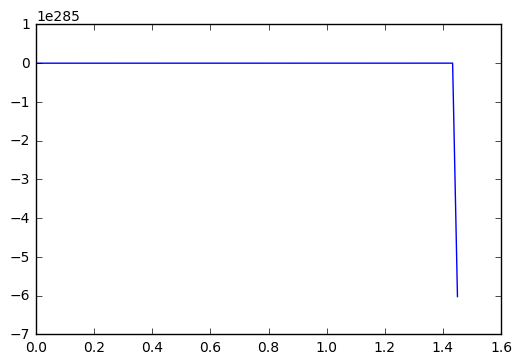

In [5]:
plt.plot( Model.time, Model.serotoninUptake)

In [ ]:
print(Model.serotoninUptake)

print(Model.time)

[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   7.90259545e-022   2.76187317e-021   1.73178904e-018  -4.95985466e-015
   1.86289985e-011  -7.79201808e-008   3.49463417e-004  -1.64289340e+000
   7.98980319e+003  -3.98623170e+007   2.02889747e+011  -1.04934865e+015
   5.49912155e+018  -2.91367331e+022   1.55825001e+026  -8.40060703e+029
   4.56040160e+033  -2.49081308e+037   1.36778174e+041  -7.54697584e+044
   4.18208428e+048  -2.32643976e+052   1.29870930e+056  -7.27305446e+059
   4.08496417e+063  -2.30050544e+067   1.29876922e+071  -7.34912621e+074
   4.16740175e+078  -2.36788330e+082   1.34792918e+086  -7.68667717e+089
   4.39069661e+093  -2.51197119e+097   1.43929453e+101  -8.25865670e+104
   4.74534572e+108  -2.73024493e+112   1.57285788e+116  -9.07219054e+119
   5.23904209e+123  -3.02895060e+127   1.75314429e+131  -1.01581297e+135
   5.89205259e+138  -3.42107769e+142   1.98833633e+146  -1.15673751e+150
   6.73574409e+153  -3.92581705e+157   2.29011001e+

In [ ]:
from matplotlib import animation
import matplotlib
import seaborn as sns


matplotlib.rc('animation', html='html5')
fig, axarr = plt.subplots(2, sharex = True)
timestamp = fig.text(0.45,0.1,'timestamp')
frames = 120
def animate(i):
    step = i * len(Model.time)//(frames)
    serotonin = Model.serConcentration[step,:,:]
    tryp = Model.trypConcentration[step,:,:]
    sns.heatmap(serotonin, vmin=0,vmax=1e-1, ax=axarr[0], cbar = None)
    axarr[0].set_title('Serotonin')
    sns.heatmap(tryp, vmin=0,vmax=1e-1, ax=axarr[1], cbar=None)
    axarr[1].set_title('Tryptophan')
    timestamp.set_text('t={0:.0f} hours'.format(Model.time[step]))
    plt.tight_layout()
    
anim = animation.FuncAnimation(fig, animate, frames=frames, repeat_delay=2000, repeat=True)
anim

In [ ]:
from SALib.sample.saltelli import sample as ss
from SALib.analyze.sobol import analyze as sa


In [ ]:
def laminarModel(data):
    trypCondition = ConditionSet(
                Concentration = data[3],
                Diffusivity = data[4],
                Permeability = data[5])

    htpCondition = ConditionSet(
                Concentration = data[6],
                Diffusivity = data[7],
                Permeability = data[8])

    serCondition = ConditionSet(
                Concentration = data[9],
                Diffusivity = data[10],
                Permeability = data[11])
    
    kinetics = KineticsParamers(vmax1 = data[12],
                            Km1 = data[13],
                            K1 = data[14],
                            vmax2 = data[15],
                            Km2 = data[16],
                            K2 = data[17])
    
    wallKinetics = KineticsParamers(vmax1 = data[18],
                            Km1 = data[19],
                            K1 = data[20],
                            vmax2 = data[21],
                            Km2 = data[22],
                            K2 = data[23])

    
    iterations = 1000
    
    Model = laminarFlow.LaminarFlow(data[0],data[1],data[2],
                                    serCondition, trypCondition, htpCondition, 
                                    kinetics, wallKinetics, 
                                    iterations)

In [ ]:


# morris_problem = {
#     # There are six variables
#     'num_vars': 23,
#     # These are their names
#     'names': ['length', 'radius', 'max_velocity', 'serConc', 'serDiff', 
#               'serPerm', 'tryConc', 'tryDiff', 'tryPerm','vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'],
#     # These are their plausible ranges over which we'll move the variables
#     'bounds': [[,], # length (m)
#                [,], # radius (m)
#                [,], # max_velocity (m/s)
#                [,], # Tryptophan Concentration
#                [,], # Tryptophan Diffusivity
#                [,], # Tryptophan Wall Permability
#                [,], # 5HTP Concentration
#                [,], # 5HTP Diffusivity
#                [,], # 5HTP Wall Permability
#                [,], # Serotonin Concentration (mM)
#                [,], # Serotonin Diffusivity 
#                [,], # Serotonin Wall Permeability 
#                [,], # Max rate of Tryp -> 5HTP
#                [,], # Michaelus Menton Constant Tryp -> 5HTP
#                [,], # Equilibrium Constant for 5HTP and Tryp
#                [,], # Max rate of 5HTP -> Serotonin
#                [,], # Michaelus Menton Constant 5HTP -> Serotonin
#                [,], # Equilibrium Constant for 5HTP and Serotonin
#                [,], # Max wall rate of Tryp -> 5HTP
#                [,], # Michaelus Menton Constant @ wall Tryp -> 5HTP
#                [,], # Equilibrium Constant for 5HTP and Tryp @ wall
#                [,], # Max rate of 5HTP -> Serotonin @ wall
#                [,], # Michaelus Menton Constant 5HTP -> Serotonin @ wall
#                [,], # Equilibrium Constant for 5HTP and Serotonin @ wall

#               ],
#     # I don't want to group any of these variables together
#     'groups': None
#     }